# Predict Customer Clicked Ads Classification by Using Machine Learning

## Background
Sebuah perusahaan di Indonesia ingin mengetahui efektifitas sebuah iklan yang mereka tayangkan, hal ini penting bagi perusahaan agar dapat mengetahui seberapa besar ketercapainnya iklan yang dipasarkan sehingga dapat menarik customers untuk melihat iklan.
Dengan mengolah data historical advertisement serta menemukan insight serta pola yang terjadi, maka dapat membantu perusahaan dalam menentukan target marketing, fokus case ini adalah membuat model machine learning classification yang berfungsi menentukan target customers yang tepat.


## Goal
Mengefektifkan target marketing dengan menggunakan machine learning

## Objective
Membuat machine learning supervised untuk mengklasifikasikan customer yang tepat untuk dijadikan target marketing

## Business Metrics


In [2]:
# Import library
import warnings
warnings.filterwarnings('ignore')

# for manipulation data (processing)
import pandas as pd
import numpy as np 
import ppscore as pps
import datetime as dt
from datetime import date
from datetime import datetime as dt

# for visualization
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.style as style
import seaborn as sns

# for EDA
import dataprep
from dataprep.eda import plot_missing
from dataprep.eda import create_report

# for machine learning
import sklearn
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, RepeatedStratifiedKFold, GridSearchCV, RandomizedSearchCV, cross_validate
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, recall_score, precision_score, f1_score, auc, roc_auc_score

# for visualization of feature importance
import shap

In [3]:
df = pd.read_csv('Clicked Ads Dataset.csv', delimiter=',')
df

Unnamed: 0  Daily Time Spent on Site  Age  Area Income  \
0             0                     68.95   35  432837300.0   
1             1                     80.23   31  479092950.0   
2             2                     69.47   26  418501580.0   
3             3                     74.15   29  383643260.0   
4             4                     68.37   35  517229930.0   
..          ...                       ...  ...          ...   
995         995                     72.97   30  499691990.0   
996         996                     51.30   45  474475190.0   
997         997                       NaN   51  296910040.0   
998         998                     55.55   19  293445530.0   
999         999                     45.01   26  209130600.0   

     Daily Internet Usage       Male        Timestamp Clicked on Ad  \
0                  256.09  Perempuan   3/27/2016 0:53            No   
1                  193.77  Laki-Laki    4/4/2016 1:39            No   
2                  236.50  Perempuan  3/13/2016 20:35            No   
3                  245.89  Laki-Laki   1/10/2016 2:31            No   
4                  225.58  Perempuan    6/3/2016 3:36            No   
..                    ...        ...              ...           ...   
995                208.58  Laki-Laki  2/11/2016 21:49           Yes   
996                134.42  Laki-Laki   4/22/2016 2:07           Yes   
997                120.37  Laki-Laki   2/1/2016 17:24           Yes   
998                187.95  Perempuan   3/24/2016 2:35            No   
999                178.35  Perempuan   6/3/2016 21:43           Yes   

              city                       province    category  
0    Jakarta Timur  Daerah Khusus Ibukota Jakarta   Furniture  
1         Denpasar                           Bali        Food  
2         Surabaya                     Jawa Timur  Electronic  
3            Batam                 Kepulauan Riau       House  
4            Medan                  Sumatra Utara     Finance  
..             ...                            ...         ...  
995       Semarang                    Jawa Tengah     Finance  
996      Pakanbaru                           Riau  Electronic  
997      Samarinda               Kalimantan Timur      Travel  
998      Tangerang                         Banten        Bank  
999         Serang                         Banten      Travel  

[1000 rows x 11 columns]

## Exploratory Data Analysis

In [4]:
# melihat kolom yang ada pada data set
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                1000 non-null   int64  
 1   Daily Time Spent on Site  987 non-null    float64
 2   Age                       1000 non-null   int64  
 3   Area Income               987 non-null    float64
 4   Daily Internet Usage      989 non-null    float64
 5   Male                      997 non-null    object 
 6   Timestamp                 1000 non-null   object 
 7   Clicked on Ad             1000 non-null   object 
 8   city                      1000 non-null   object 
 9   province                  1000 non-null   object 
 10  category                  1000 non-null   object 
dtypes: float64(3), int64(2), object(6)
memory usage: 86.1+ KB


Dari informasi di atas dapat diketahui bahwa data set terdiri dari 1000 baris dan 11 kolom. Selain itu dapat diketahui juga bahwa terdapat beberapa missing values. Mari kita cek kolom yang terdapat missing value

  0%|          | 0/140 [00:00<?, ?it/s]


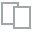
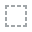
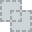
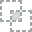
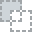
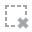
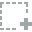
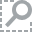
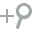
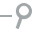
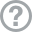
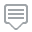
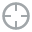
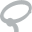
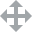
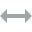
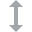
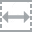
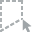
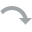
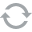
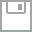
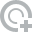
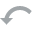
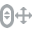
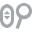
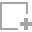
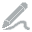
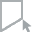
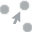
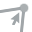
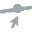

In [5]:
plot_missing(df)

Terdapat 4 kolom yang memiliki missing values yaitu kolom `Daily Time Spent on Site`, `Area Income`, `Daily Internet Usage`, dan kolom `Male`. Selain itu terdapat tipe data yang tidak cocok yaitu pada kolom `Timestamp` yang seharusnya adalah datetime akan tetapi pada dataset bertipe object. Untuk kolom `Unnamed: 0`, nanti dapat dilakukan drop karena memiliki nilai unique yang sama dengan index.

In [6]:
# Mengganti tipe data dari kolom Timestamp
df['Timestamp'] = pd.to_datetime(df['Timestamp']) 
df['Timestamp'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 1000 entries, 0 to 999
Series name: Timestamp
Non-Null Count  Dtype         
--------------  -----         
1000 non-null   datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 7.9 KB


In [7]:
df.duplicated().any()

False

In [8]:
df.drop('Unnamed: 0', axis=1, inplace=True)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Daily Time Spent on Site  987 non-null    float64       
 1   Age                       1000 non-null   int64         
 2   Area Income               987 non-null    float64       
 3   Daily Internet Usage      989 non-null    float64       
 4   Male                      997 non-null    object        
 5   Timestamp                 1000 non-null   datetime64[ns]
 6   Clicked on Ad             1000 non-null   object        
 7   city                      1000 non-null   object        
 8   province                  1000 non-null   object        
 9   category                  1000 non-null   object        
dtypes: datetime64[ns](1), float64(3), int64(1), object(5)
memory usage: 78.2+ KB


Tidak terdapat data duplicate

### Statistika Deskriptive

#### Data Numerik

In [10]:
list_nums = list(df.select_dtypes(['int64','float64']))
list_nums

['Daily Time Spent on Site', 'Age', 'Area Income', 'Daily Internet Usage']

In [11]:
df.select_dtypes(['int64','float64']).describe()

Daily Time Spent on Site          Age   Area Income  \
count                987.000000  1000.000000  9.870000e+02   
mean                  64.929524    36.009000  3.848647e+08   
std                   15.844699     8.785562  9.407999e+07   
min                   32.600000    19.000000  9.797550e+07   
25%                   51.270000    29.000000  3.286330e+08   
50%                   68.110000    35.000000  3.990683e+08   
75%                   78.460000    42.000000  4.583554e+08   
max                   91.430000    61.000000  5.563936e+08   

       Daily Internet Usage  
count            989.000000  
mean             179.863620  
std               43.870142  
min              104.780000  
25%              138.710000  
50%              182.650000  
75%              218.790000  
max              267.010000

Dari informasi di atas dapat diketahui bahwa:
* Terdapat perbedaan nilai mean dan median yang berbeda dari setiap kolom numerikal yang menandakan bahwa distribusi data tidak normal, namun hal ini akan dipastikan lagi dengan plot distribusi dan juga nilai skewness.
* Terdapat perbedaan yang signifikan antaran nilai minumum dengan kuartial bawah (25%) dan nilai maksimum dengan kuartil atas (75%) yang menandakan bahwa terdapat outliers pada data, namum hal ini akan dipastikan lagi nanti dengan menggunakan boxplot.
* Nilai standar deviasi yang cukup besar menandakan bahwa data tersebar (jauh dari rata-rata).
* Rata-rata customer menghabiskan waktu sekitar 64 menit di platfrom/website
* Rata-rata customer bersuia 36 tahun.
* Rata-rata area income adalah sebesar IDR 384,864,700
* Rata-rata customer menggunakan internat dalam sehari adalah 179 minutes.

In [12]:
# check the value of numerical data
for i in list_nums:
    print(f"\nValue count kolom {i}:\n{20*'='}")
    print(df[i].value_counts())


Value count kolom Daily Time Spent on Site:
84.53    3
75.55    3
78.76    3
77.05    3
62.26    3
        ..
61.09    1
65.77    1
37.87    1
60.91    1
45.01    1
Name: Daily Time Spent on Site, Length: 890, dtype: int64

Value count kolom Age:
31    60
36    50
28    48
29    48
33    43
35    39
30    39
34    39
32    38
26    37
38    37
37    36
40    36
27    33
41    32
45    30
39    30
25    27
42    26
43    23
44    21
24    21
50    20
23    19
46    18
49    18
48    16
52    15
47    13
22    13
51    12
53    10
54     9
55     7
20     6
21     6
57     6
19     6
60     4
58     4
56     2
59     2
61     1
Name: Age, dtype: int64

Value count kolom Area Income:
432837300.0    1
265358030.0    1
422206330.0    1
471261000.0    1
350387310.0    1
              ..
518172270.0    1
423854620.0    1
405883100.0    1
369154310.0    1
209130600.0    1
Name: Area Income, Length: 987, dtype: int64

Value count kolom Daily Internet Usage:
215.18    2
167.22    2
162.44    2


#### Data Kategori

In [13]:
list_cats = list(df.select_dtypes('object'))
list_cats

['Male', 'Clicked on Ad', 'city', 'province', 'category']

In [14]:
df.select_dtypes('object').describe()

Male Clicked on Ad      city                       province  \
count         997          1000      1000                           1000   
unique          2             2        30                             16   
top     Perempuan            No  Surabaya  Daerah Khusus Ibukota Jakarta   
freq          518           500        64                            253   

        category  
count       1000  
unique        10  
top     Otomotif  
freq         112

In [15]:
df['Male'].unique()

array(['Perempuan', 'Laki-Laki', nan], dtype=object)

In [16]:
df.rename(columns={'Male':'Gender'}, inplace=True)

In [17]:
df.sample(5)

Daily Time Spent on Site  Age  Area Income  Daily Internet Usage  \
1                       80.23   31  479092950.0                193.77   
92                      70.03   26  449849750.0                227.72   
472                     78.37   24  385105560.0                207.27   
784                     35.21   39  366380700.0                154.00   
108                     47.53   30  232806630.0                135.18   

        Gender           Timestamp Clicked on Ad               city  \
1    Laki-Laki 2016-04-04 01:39:00            No           Denpasar   
92   Laki-Laki 2016-05-22 20:49:00            No      Jakarta Barat   
472  Perempuan 2016-01-23 04:47:00            No  Tangerang Selatan   
784  Laki-Laki 2016-03-25 06:36:00           Yes      Jakarta Pusat   
108  Perempuan 2016-04-03 05:10:00           Yes            Bandung   

                          province    category  
1                             Bali        Food  
92   Daerah Khusus Ibukota Jakarta        Food  
472                         Banten     Fashion  
784  Daerah Khusus Ibukota Jakarta  Electronic  
108                     Jawa Barat        Food

In [18]:
list_cats = list(df.select_dtypes('object'))
list_cats

['Gender', 'Clicked on Ad', 'city', 'province', 'category']

In [19]:
# check the value of numerical data
for i in list_cats:
    print(f"\nValue count kolom {i}:\n{20*'='}")
    print(df[i].value_counts())


Value count kolom Gender:
Perempuan    518
Laki-Laki    479
Name: Gender, dtype: int64

Value count kolom Clicked on Ad:
No     500
Yes    500
Name: Clicked on Ad, dtype: int64

Value count kolom city:
Surabaya             64
Bandung              64
Jakarta Timur        63
Jakarta Selatan      61
Jakarta Barat        57
Bekasi               56
Medan                48
Jakarta Utara        45
Palembang            42
Semarang             41
Batam                34
Makassar             33
Tangerang Selatan    33
Tangerang            32
Depok                30
Bandar Lampung       29
Bogor                28
Jakarta Pusat        27
Malang               26
Banjarmasin          23
Pakanbaru            23
Denpasar             21
Padang               19
Balikpapan           18
Cimahi               17
Samarinda            16
Tasikmalaya          15
Pontianak            12
Surakarta            12
Serang               11
Name: city, dtype: int64

Value count kolom province:
Daerah Khusus Ibukota J

dari informasi di atas dapat diketahui bahwa:
* Pada kolom male nilai yang paling banyaka ada 'Perempuan' sehingga kebanyakan customer adalah perempuan. Penamaan kolom ini agak membingungkan sehingga nanti akan dilakukan perubahan nama kolom.
* Cliked on Ad baik value yes dan no memiliki nilai yang sama.
* Kota dengan customers yang terbanyak adalah Kota Surabaya dan Bandung
* Provinsi dengan customers terbanyak adalah provinsi Daerah Khusus Ibukota Jakarta
* Berdasarkan 'category' nilai yang paling banyak adalah Otomotif.

#### Data datetime

In [20]:
list_dats = list(df.select_dtypes('datetime64[ns]'))
list_dats

['Timestamp']

In [21]:
df.select_dtypes('datetime64[ns]').describe()

Timestamp
count                  1000
unique                  997
top     2016-05-26 15:40:00
freq                      2
first   2016-01-01 02:52:00
last    2016-07-24 00:22:00

Dari informasi di atas dapat diketahui bahwa:
* Terdapat perbedaan antara nilai 'count' dengan 'unique' yang menandakana bahwa terdapat customer yang mengklik iklan secara bersamaan.
* 2 kali dengan customer yang berbeda mengklik iklan diwaktu yang bersamaan yaitu  pada 2016-05-26 15:40:00
* Iklan pertama kali diklik pada 2016-01-01 02:52:00
* Iklan terakhir kalik diklik pada 2016-07-24 00:22:00
sehingga dari data didapatkan bahwa iklan berlangsung selama 7 bulan yaitu dari bulan Januari 2016 hingga Juli 2016.

### Univarate Analysis

#### Data Numerik

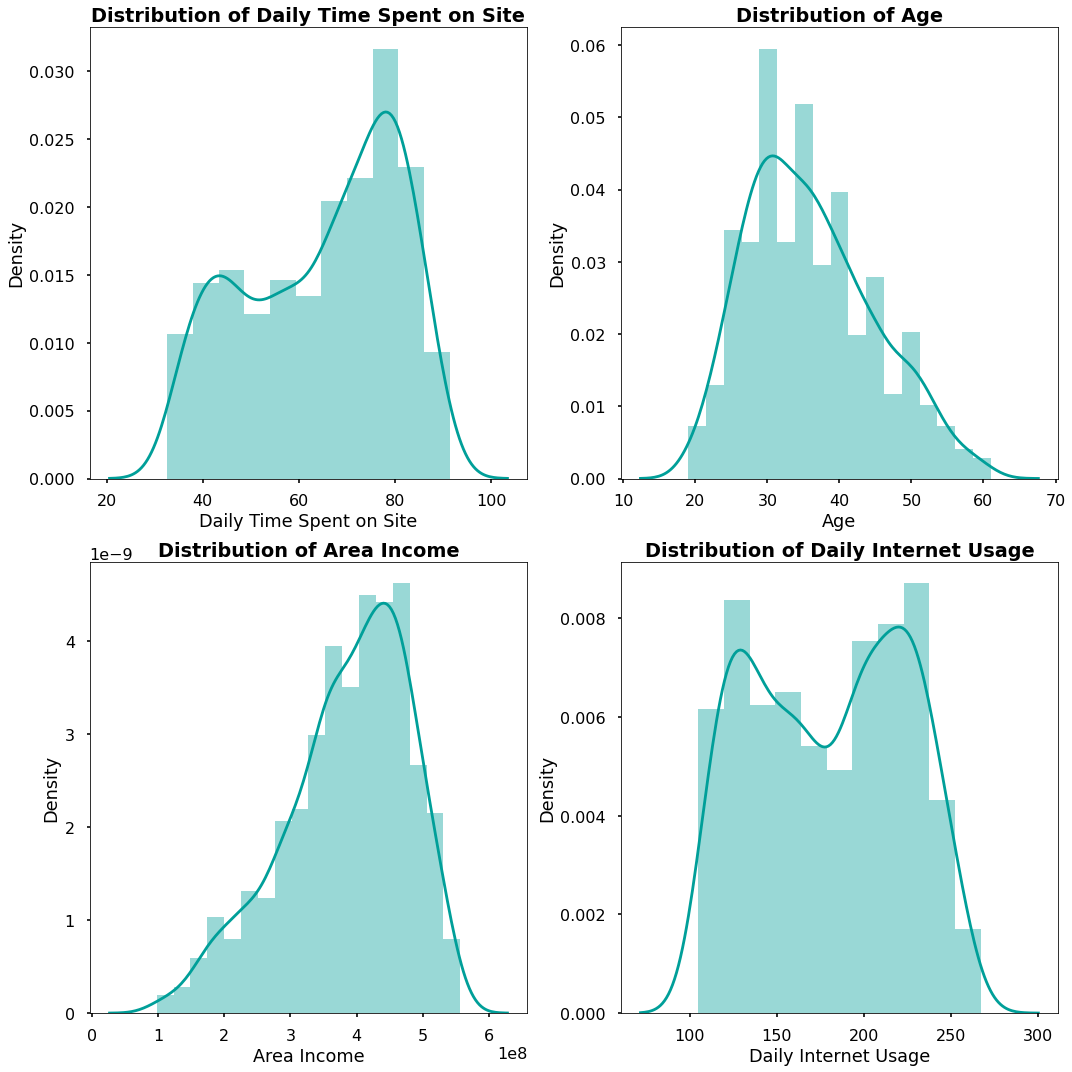

In [22]:
style.use('seaborn-v0_8-poster')
plt.figure(figsize=(15,15))
for i in range(0, len(list_nums)):
    plt.subplot(2, 2, i+1)
    sns.distplot(x=df[list_nums[i]], color='#009f99')
    plt.title('Distribution of {}'.format(list_nums[i]),fontweight='bold')
    plt.xlabel(list_nums[i])
    plt.tight_layout()

Dari gambar distribusi data dapat diketahui bahwa:
* Customer paling banyak menghabiskan waktu di dalam site berkisar 75 - 85 menit
* Customer paling banyak berada pada rentang usia 30 - 35 tahun
* Berdasarkan area income, area income terbanyak berada pada kisaraan IDR 400,000,000 - IDR 500,000,
* Customer menggunakan internat dalam sehari terbanyak pada rentang 220 - 240 minutes.

In [23]:
for i in range(0, len(list_nums)):
    print(f"Skewness {df[list_nums].columns[i]} : {df[list_nums[i]].skew()}")

Skewness Daily Time Spent on Site : -0.36975576201210597
Skewness Age : 0.4791416884125751
Skewness Area Income : -0.6443017726963709
Skewness Daily Internet Usage : -0.03139523418033974


Dari plot distribusi dan nilai skewness dapat diketahui bahwa data numerik memiliki distribusi yang mendekatai distribusi normal dengan 3 dari 4 data numerik memiliki nilai skewness yang negatif ('Daily Time Spent', 'Area Income', 'Daily Internet Usage'); nilai positif yaitu 'Age'. Selanjutnya, mari kita cek outliers.

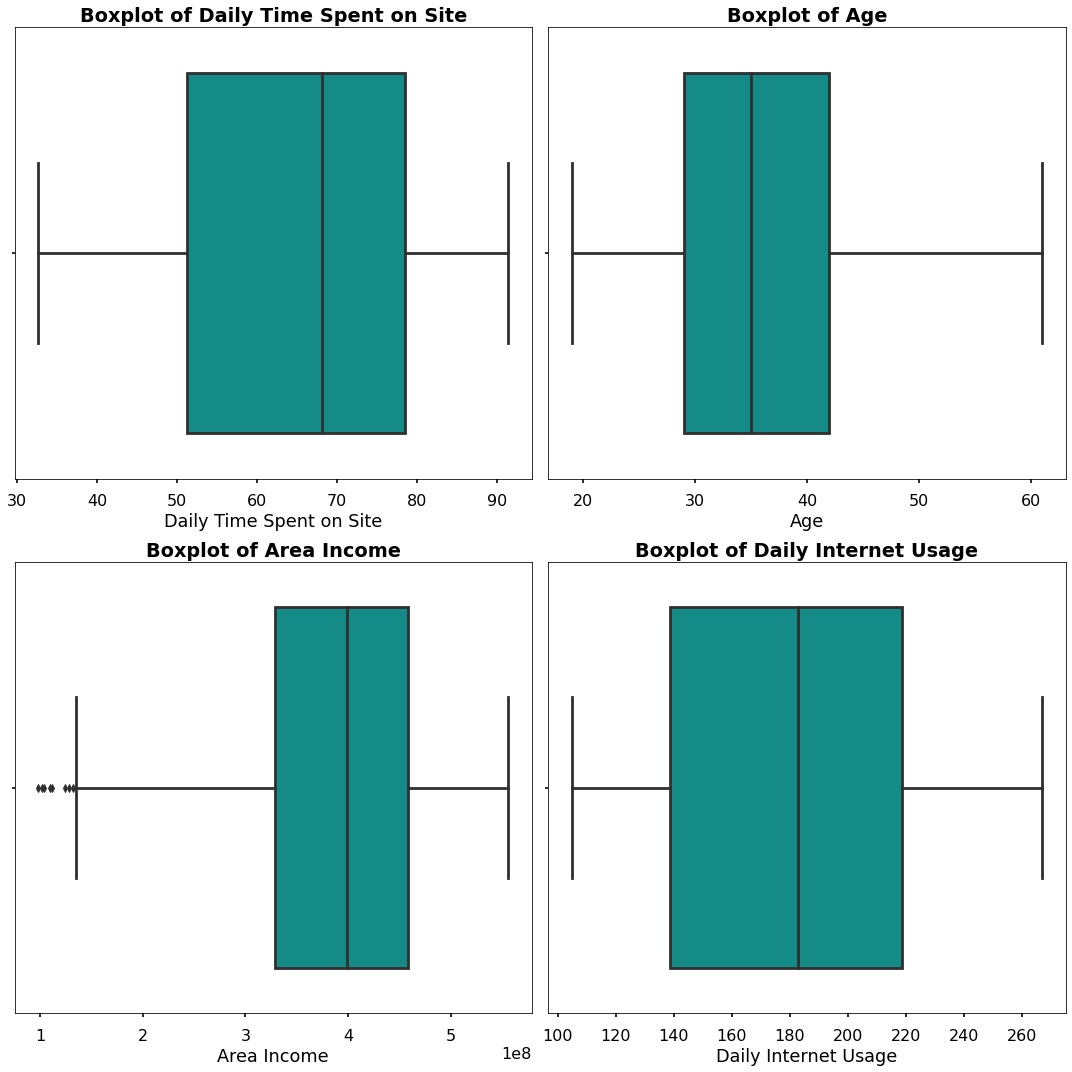

In [24]:
style.use('seaborn-v0_8-poster')
plt.figure(figsize=(15,15))
for i in range(0, len(list_nums)):
    plt.subplot(2, 2, i+1)
    sns.boxplot(x=df[list_nums[i]], color='#009f99')
    plt.title('Boxplot of {}'.format(list_nums[i]),fontweight='bold')
    plt.xlabel(list_nums[i])
    plt.tight_layout()

Dari boxplot diatas didapatkan bahwa hanya pada kolom `Area Income` yang memiliki outliers. Sehingga hal ini nantinya perlu dilakukan handle outliers.

### Data Kategori

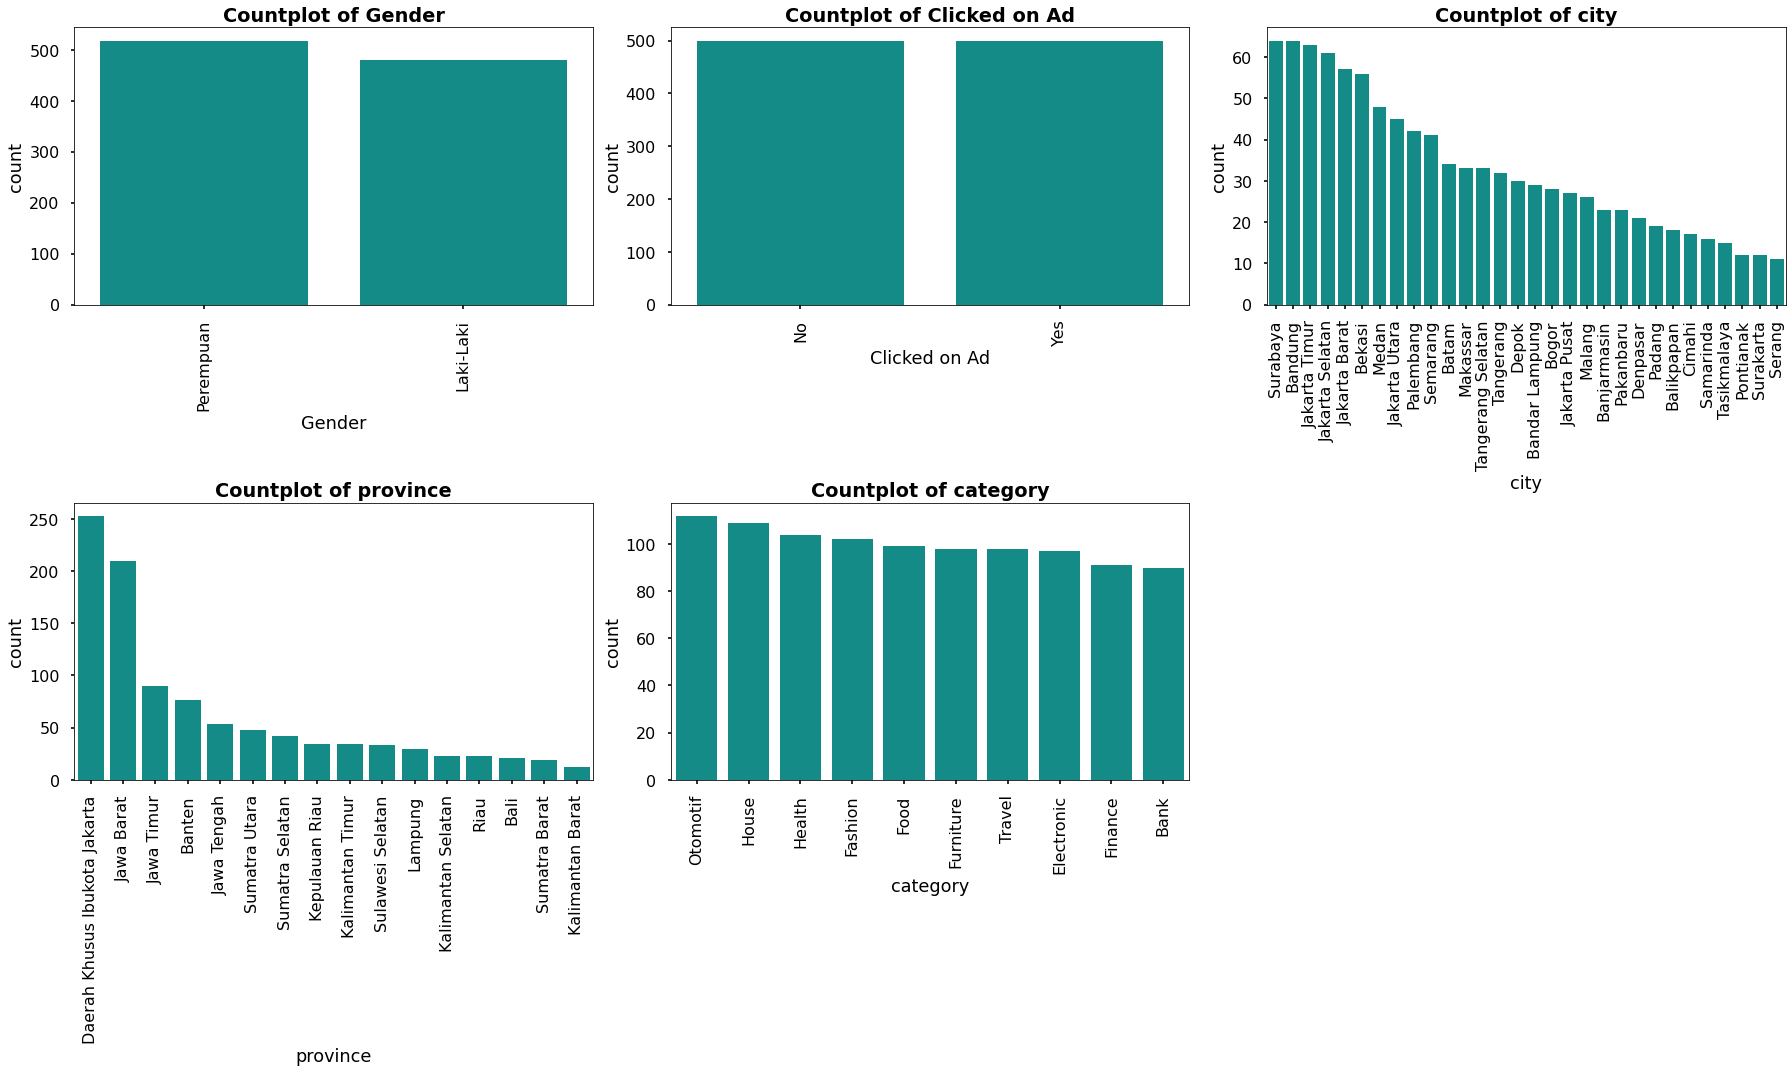

In [25]:
# Membuat catplot untuk setiap kolom kategori
style.use('seaborn-v0_8-poster')
plt.figure(figsize=(25, 15))
for i in range(0, len(list_cats)):
    plt.subplot(2,3, i+1)
    sns.countplot(x=df[list_cats[i]], color='#009f99', order = df[list_cats[i]].value_counts().index)
    plt.title('Countplot of {}'.format(list_cats[i]),fontweight='bold')
    plt.xlabel(list_cats[i])
    plt.tight_layout()
    plt.xticks(rotation = 90)

Dari gambar diatas dapat diketahui bahwa:  
* Perempuan merupakan customer terbanyak meskipun tidak terdapat perbedaan yang signifikan.
* Tidak terdapat perbedaan dari jumlah customer mengklik iklan dan yang tidak mengklik iklan.
* Bandung dan Surabaya memiliki merupakan kota dengan customer yang paling banyak.
* Provinsi DKI Jakarata merupakan provinsi dengan jumlah customer terbanyak.
* Otomotif merupakan `category` terbanyak namun demikian tidak terdapat perbedaan yang signifikan dengan `category` yang lainnya.

### Bivariate Analysis

Fitur yang akan dijadikan fitur target adalah kolom `Clicked on Ad` sehingga dalam hal ini nilai yang terdapat pada kolom ini akan dijadikan sebagai pembanding (hue).

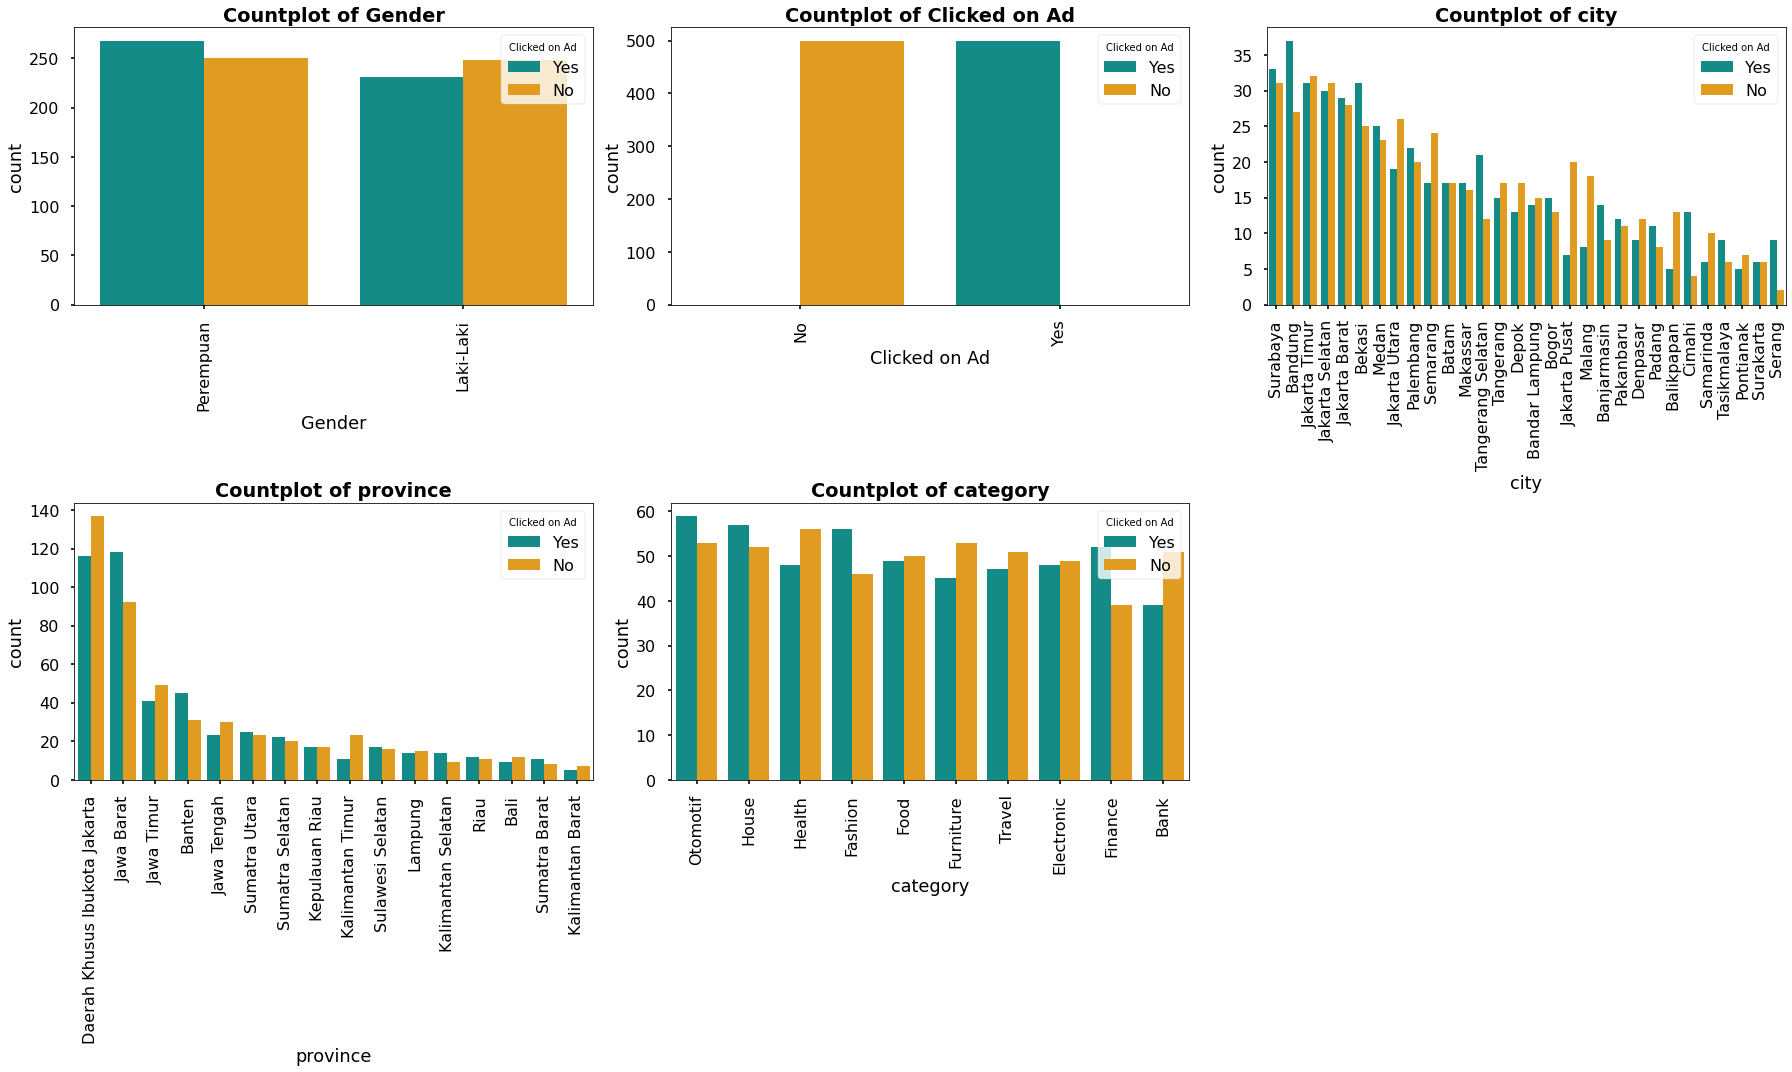

In [26]:
# Membuat catplot untuk setiap kolom kategori
style.use('seaborn-v0_8-poster')
plt.figure(figsize=(25, 15))
for i in range(0, len(list_cats)):
    plt.subplot(2,3, i+1)
    sns.countplot(x=df[list_cats[i]], order = df[list_cats[i]].value_counts().index, hue=df['Clicked on Ad'], hue_order=['Yes', 'No'],palette=["#009f99", "orange"])
    plt.title('Countplot of {}'.format(list_cats[i]),fontweight='bold')
    plt.xlabel(list_cats[i])
    plt.tight_layout()
    plt.xticks(rotation = 90)

Diperoleh bahwa:
* Pada perempuan lebih banyak mengklik iklan daripada tidak mengklik iklan. Sebaliknya, pada laki-laki lebih banyak tidak mengklik iklan dibandingkan yang mengklik iklan. Namun secara keseluruhan tidak terdapat perbedaan yang cukup signifikan.  
* Untuk kolom lainnya tidak ada nilai yang terlalu mendominasi dan tidak dapat ditarik kesimpulan.

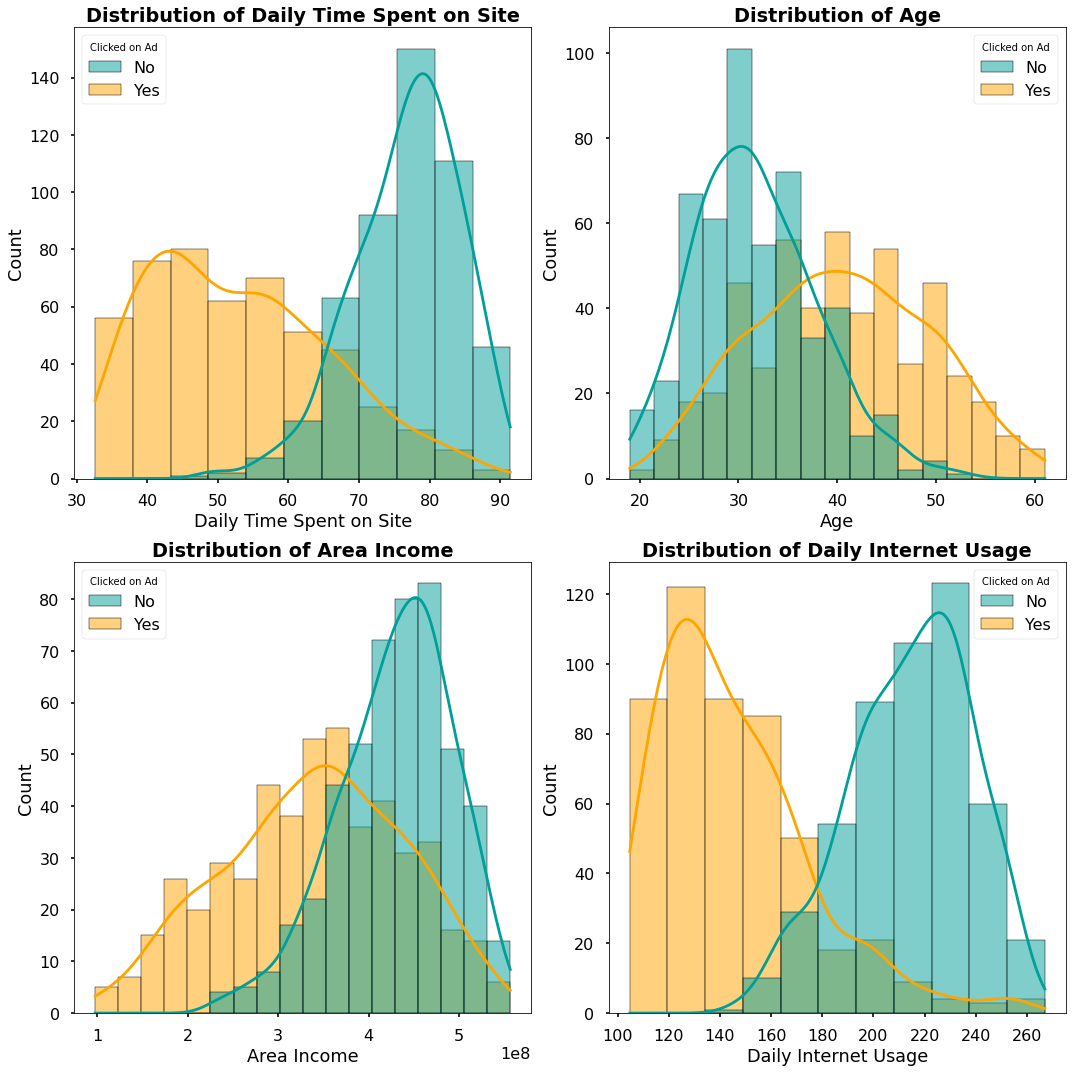

In [27]:
style.use('seaborn-v0_8-poster')
plt.figure(figsize=(15,15))
for i in range(0, len(list_nums)):
    plt.subplot(2, 2, i+1)
    sns.histplot(x=df[list_nums[i]], kde = True, hue = df['Clicked on Ad'],palette=["#009f99", "orange"],alpha = 0.5)
    plt.title('Distribution of {}'.format(list_nums[i]),fontweight='bold')
    plt.xlabel(list_nums[i])
    plt.tight_layout()

Dari gambar di atas didapatkan bahwa:
* Dayly Time Spent on Site customer yang mengklik iklan kebanyakan berada pada rentanga 40 - 50 minutes. Sedangkan yang tidak mengklik iklan berada pada rentang 75 - 85 menit.  
* Age untuk customer yang mengklik iklan cendrung menyerupai distribusi normal dengan customer terbanyak berada pada rentang usia 35 - 45 tahun. Sedangkan yang tidak mengklik iklan memiliki distribusi yang skew dengan customer terbanyak berada pada rentang usia 28 -32 tahun.  
* Area Income untuk customer yang mengklik iklan memiliki distribusi menyerupai distribusi normal dengan customer terbanyak dengan area income sebesa IDR 300 juta - IDR 400 juta. Sedangkan yang tidak mengklik iklan memiliki distribusi yang skew dengan customer terbanyak dengan area income sekitar IDR 430 juta - IDR 480 juta.  
* Daily internet usage untuk customer yang mengklik iklan cenderung lebih sedikit dengan customer terbanyak memiliki dengan daily internet usage 120 -140 menit. Sedangkan customer yang tidak mengklik iklan memiliki kecenderungan dengan daiy usage yang besar, dengan customer terbanyak berada pada rentangan 220 - 240 menit.

Mari kita lanjutkan dengan pairplot.

In [28]:
df[list_nums]

Daily Time Spent on Site  Age  Area Income  Daily Internet Usage
0                       68.95   35  432837300.0                256.09
1                       80.23   31  479092950.0                193.77
2                       69.47   26  418501580.0                236.50
3                       74.15   29  383643260.0                245.89
4                       68.37   35  517229930.0                225.58
..                        ...  ...          ...                   ...
995                     72.97   30  499691990.0                208.58
996                     51.30   45  474475190.0                134.42
997                       NaN   51  296910040.0                120.37
998                     55.55   19  293445530.0                187.95
999                     45.01   26  209130600.0                178.35

[1000 rows x 4 columns]

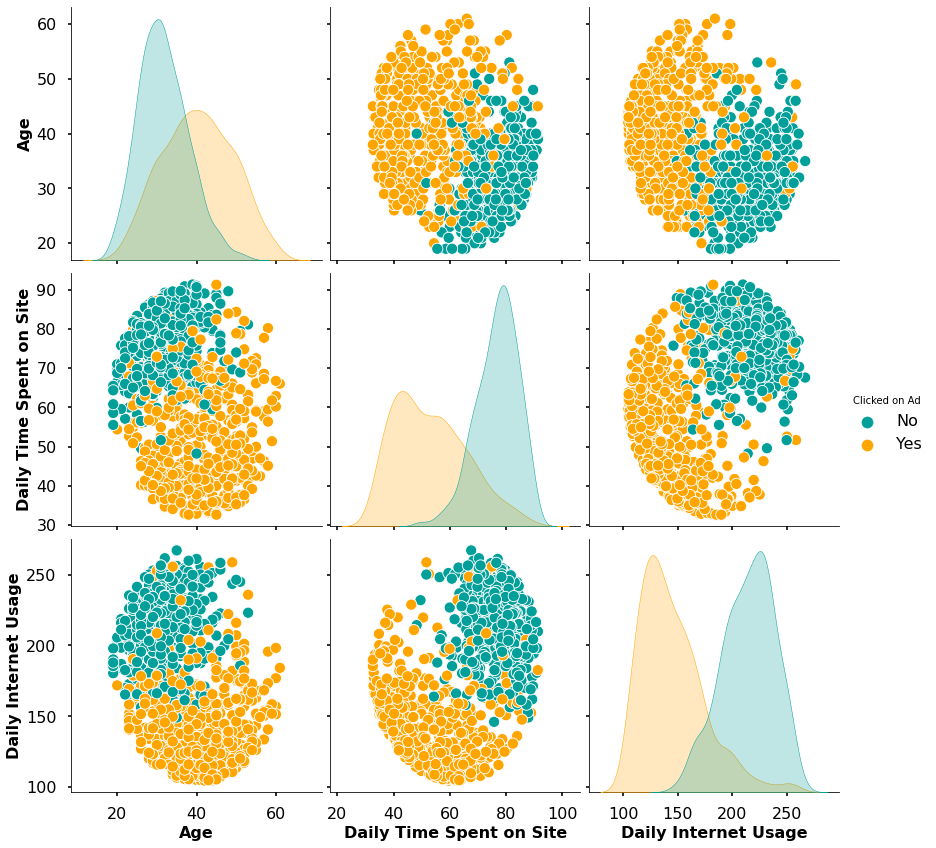

In [29]:
df_pairplot = df[['Age','Daily Time Spent on Site','Daily Internet Usage','Clicked on Ad']]
style.use('seaborn-v0_8-poster')
pr = sns.pairplot(df_pairplot, diag_kind='kde',hue='Clicked on Ad', palette=["#009f99", "orange"], size=4)
for ax in pr.axes.flatten():
    ax.set_ylabel(ax.get_ylabel(),fontsize=16, fontweight='bold')
    ax.set_xlabel(ax.get_xlabel(),fontsize=16, fontweight='bold')

Dari pairplot di atas didapatkan bahwa:
*  Semakin tua usia customer maka semakin kecil nilai Daily internet usage dan juga daily time spent on site (berbanding terbalik).
*  didapatkan juga bahwa kecenderungan customer yang mengklik iklan terdiri dari berbagai usia yang memiliki Daily internet usage dan juga daily time spent on site yang kecil.
* Untuk daily time spent on site dan daily interner usage memiliki korelasi yang positif dimana semakin bear nilai daily spent on site, maka semakin besar juga daily internet usage.

### Multivariate Analysis

[Text(0.5, 0, 'Daily Time Spent on Site'),
 Text(1.5, 0, 'Age'),
 Text(2.5, 0, 'Area Income'),
 Text(3.5, 0, 'Daily Internet Usage')]

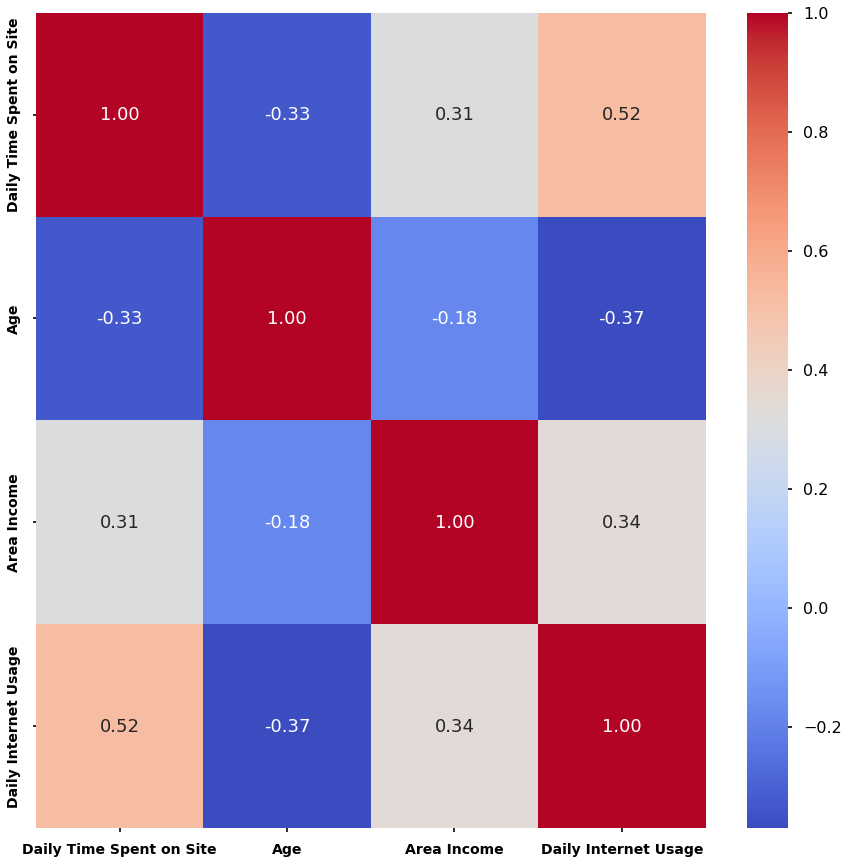

In [30]:
style.use('seaborn-v0_8-poster')
plt.figure(figsize=(15, 15))
ax = sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f',annot_kws={'size': 18})
ax.set_yticklabels(ax.get_yticklabels(), fontsize=14, fontweight='bold')
ax.set_xticklabels(ax.get_xticklabels(), fontsize=14, fontweight='bold')

Dari korelasi heatmap di atas diketahui bahwa fitur yang memiliki korelasi tertinggi adalah antara daily time spent on site dengan daily internet usage yaitu sebesar 0.52. Angka ini tidak terlalu besar sehingga tidak menandakan adanya fitur yang redundan dan semua fitur dapat digunakan untuk machine learning. Selain itu juga ditemukan nilai korelasi negatif yaitu age dan daily internet usage, age dengan area income, dan age dengan daily time spent on site. Namun demikian nilai korelasi terebut tidak besar dan tidak melebihi 0.7.

Dari heatmap correlation (pearson correlation) hanya menunjukkan korelasi fitur numerik saja. Sedangkan fitur kategori tidak diketahui nilai korelasinya. Untuk itu dapat digunakan PPS (Predictive Power Score) yang dapat melihat hubungan dari semua fitur dengan target (`Clicked on Ad`).

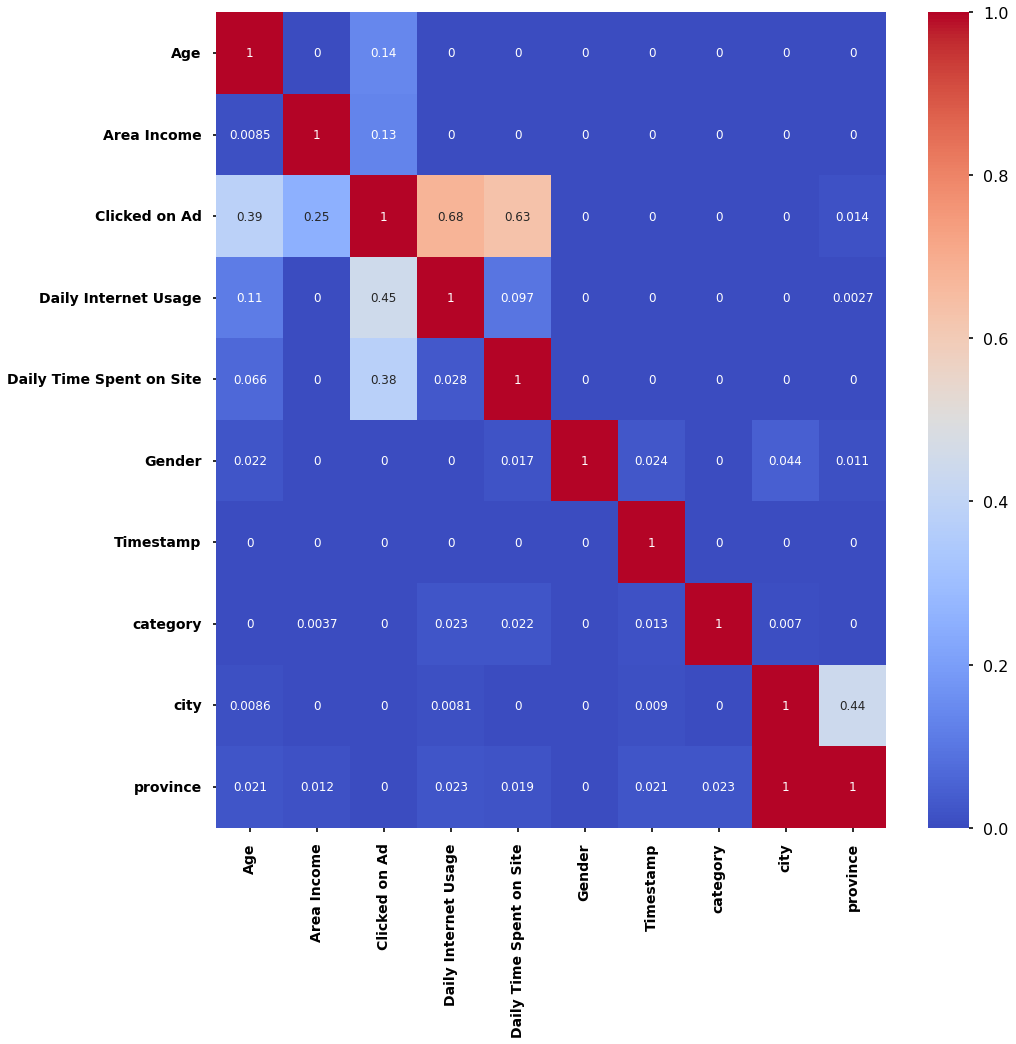

In [31]:
df_pps = pps.matrix(df)
matrix_df = df_pps[['x', 'y', 'ppscore']].pivot(columns='x', index='y', values='ppscore')
plt.figure(figsize=(15, 15))
ax = sns.heatmap(matrix_df, vmin=0, vmax=1, cmap='coolwarm', annot=True, annot_kws={'size': 12})
ax.set_yticklabels(ax.get_yticklabels(), fontsize=14, fontweight='bold')
ax.set_xticklabels(ax.get_xticklabels(), fontsize=14, fontweight='bold')
plt.xlabel(None)
plt.ylabel(None)
plt.show()

PPS (Predictive Power Score) didaptkan bahwa fitur `Daily Internet Usage`, `Daily Time Spent on Site`, `Age`, dan `Area Income` memiliki score yang besar dibandingkan fitur lainnya.

## Data Preprocessing

Seperti yang diketahui bahwa pada data set terdapat missing value dan juga outlier. Pada tahap ini kita akan handle hal tersebut. Sedangkan handle duplicate tidak dilakukan karean tidak terdapat data duplicate. Mari terlebih dahulu kita tentukan fitur target.

In [32]:
df.duplicated().any()

False

### Fitur / Variable Target
Fitur target pada machine learning ini adalah `Clicked on Ad` yang menandakan apakah customer mengklik iklan atau tidak. Karena nilai dari fitur ini adalah 'Yes' dan 'No' maka kita akan menggantinya dengan nilai 1 dan 0.

In [33]:
# Copy df 
df_pre = df.copy()

In [34]:
df_pre['Target'] = df['Clicked on Ad'].apply(lambda x: 1 if x=='Yes' else 0)
df_pre.drop('Clicked on Ad', axis=1, inplace=True)
df_pre.head(5)

Daily Time Spent on Site  Age  Area Income  Daily Internet Usage  \
0                     68.95   35  432837300.0                256.09   
1                     80.23   31  479092950.0                193.77   
2                     69.47   26  418501580.0                236.50   
3                     74.15   29  383643260.0                245.89   
4                     68.37   35  517229930.0                225.58   

      Gender           Timestamp           city  \
0  Perempuan 2016-03-27 00:53:00  Jakarta Timur   
1  Laki-Laki 2016-04-04 01:39:00       Denpasar   
2  Perempuan 2016-03-13 20:35:00       Surabaya   
3  Laki-Laki 2016-01-10 02:31:00          Batam   
4  Perempuan 2016-06-03 03:36:00          Medan   

                        province    category  Target  
0  Daerah Khusus Ibukota Jakarta   Furniture       0  
1                           Bali        Food       0  
2                     Jawa Timur  Electronic       0  
3                 Kepulauan Riau       House       0  
4                  Sumatra Utara     Finance       0

### Handle Missing Values

In [35]:
df_pre.isnull().sum()

Daily Time Spent on Site    13
Age                          0
Area Income                 13
Daily Internet Usage        11
Gender                       3
Timestamp                    0
city                         0
province                     0
category                     0
Target                       0
dtype: int64

Untuk handle missing value pada empat kolom tersebut akan dilakukan berdasarkan nilai dari skewness dan nilai yang paling banyak:
* Kolom `Daily Time Spent on Site` akan diisi dengan nilai rata-rata karena simetri skew
* Kolom `Area Income` akan diisi dengan median karena skew
* Kolom `Daily Internet Usage` akan diisi engan rata-rata karena simetri skew
* Kolom `Gender` akan diisi dengan modus

In [36]:
df_pre['Daily Time Spent on Site'].fillna(df_pre['Daily Time Spent on Site'].mean(), inplace=True)
df_pre['Area Income'].fillna(df_pre['Area Income'].median(), inplace=True)
df_pre['Daily Internet Usage'].fillna(df_pre['Daily Internet Usage'].mean(), inplace=True)
df_pre['Gender'].fillna(df_pre['Gender'].mode()[0], inplace=True)

In [37]:
df_pre.isnull().any()

Daily Time Spent on Site    False
Age                         False
Area Income                 False
Daily Internet Usage        False
Gender                      False
Timestamp                   False
city                        False
province                    False
category                    False
Target                      False
dtype: bool

### Extract Date Time Data

Pada tahap ini kita akan membuat kolom baru berdasarkan kolom `Timestamp`. Kolom yang akan dibuat adalah kolom `month`, `days`, dan `Weekdays` yang menandkan 0 dengan hari senin dan 6 menandakan minggu. Selanjutnya akan dikelompokkan menjadi weekday dan weekend (sabtu dan minggu).

In [38]:
# Creates a new column called Month
df_pre['Month'] = df_pre['Timestamp'].dt.month 
# Creates a new column called days
df_pre['Days'] = df_pre['Timestamp'].dt.day
# Creates a new column called Weekdays to indicate that 0 is monday
df_pre['Weekdays'] = df_pre['Timestamp'].dt.dayofweek 
# Drop Timestamp column
df_pre.drop('Timestamp', axis=1, inplace=True)

In [39]:
df_pre.head(5)

Daily Time Spent on Site  Age  Area Income  Daily Internet Usage  \
0                     68.95   35  432837300.0                256.09   
1                     80.23   31  479092950.0                193.77   
2                     69.47   26  418501580.0                236.50   
3                     74.15   29  383643260.0                245.89   
4                     68.37   35  517229930.0                225.58   

      Gender           city                       province    category  \
0  Perempuan  Jakarta Timur  Daerah Khusus Ibukota Jakarta   Furniture   
1  Laki-Laki       Denpasar                           Bali        Food   
2  Perempuan       Surabaya                     Jawa Timur  Electronic   
3  Laki-Laki          Batam                 Kepulauan Riau       House   
4  Perempuan          Medan                  Sumatra Utara     Finance   

   Target  Month  Days  Weekdays  
0       0      3    27         6  
1       0      4     4         0  
2       0      3    13         6  
3       0      1    10         6  
4       0      6     3         4

In [40]:
df_pre['Types of days'] =  df_pre['Weekdays'].apply(lambda x: 'Weekend' if x == 5 or x == 6 else 'Weekday')
df_pre

Daily Time Spent on Site  Age  Area Income  Daily Internet Usage  \
0                   68.950000   35  432837300.0                256.09   
1                   80.230000   31  479092950.0                193.77   
2                   69.470000   26  418501580.0                236.50   
3                   74.150000   29  383643260.0                245.89   
4                   68.370000   35  517229930.0                225.58   
..                        ...  ...          ...                   ...   
995                 72.970000   30  499691990.0                208.58   
996                 51.300000   45  474475190.0                134.42   
997                 64.929524   51  296910040.0                120.37   
998                 55.550000   19  293445530.0                187.95   
999                 45.010000   26  209130600.0                178.35   

        Gender           city                       province    category  \
0    Perempuan  Jakarta Timur  Daerah Khusus Ibukota Jakarta   Furniture   
1    Laki-Laki       Denpasar                           Bali        Food   
2    Perempuan       Surabaya                     Jawa Timur  Electronic   
3    Laki-Laki          Batam                 Kepulauan Riau       House   
4    Perempuan          Medan                  Sumatra Utara     Finance   
..         ...            ...                            ...         ...   
995  Laki-Laki       Semarang                    Jawa Tengah     Finance   
996  Laki-Laki      Pakanbaru                           Riau  Electronic   
997  Laki-Laki      Samarinda               Kalimantan Timur      Travel   
998  Perempuan      Tangerang                         Banten        Bank   
999  Perempuan         Serang                         Banten      Travel   

     Target  Month  Days  Weekdays Types of days  
0         0      3    27         6       Weekend  
1         0      4     4         0       Weekday  
2         0      3    13         6       Weekend  
3         0      1    10         6       Weekend  
4         0      6     3         4       Weekday  
..      ...    ...   ...       ...           ...  
995       1      2    11         3       Weekday  
996       1      4    22         4       Weekday  
997       1      2     1         0       Weekday  
998       0      3    24         3       Weekday  
999       1      6     3         4       Weekday  

[1000 rows x 13 columns]

### Handling Outliers

Seperti yang diketahui bahwa pada kolom `Area Income` terdapat outliers oleh karena itu kita akan handle hal tersebut dengan remove outliers

In [41]:
df_iqr = df_pre.copy()
outliers_cols_list = ['Area Income']

print(f'Jumlah baris sebelum memfilter outlier: {len(df_iqr)}')
filtered_entries = np.array([True] * len(df_iqr))

for col in outliers_cols_list:
    Q1 = df_iqr[col].quantile(0.25)
    Q3 = df_iqr[col].quantile(0.75)
    IQR = Q3 - Q1
    low_limit = Q1 - (IQR * 1.5)
    high_limit = Q3 + (IQR * 1.5)

    filtered_entries = ((df_iqr[col] >= low_limit) & (df_iqr[col] <= high_limit)) & filtered_entries
    
df_iqr = df_iqr[filtered_entries]
print(f'Jumlah baris setelah memfilter outlier: {len(df_iqr)}')
print(f'Jumlah data yang difilter: {round((len(df_pre)-len(df_iqr))/len(df_pre)*100, 2)}%')

Jumlah baris sebelum memfilter outlier: 1000
Jumlah baris setelah memfilter outlier: 991
Jumlah data yang difilter: 0.9%


<AxesSubplot: xlabel='Area Income'>

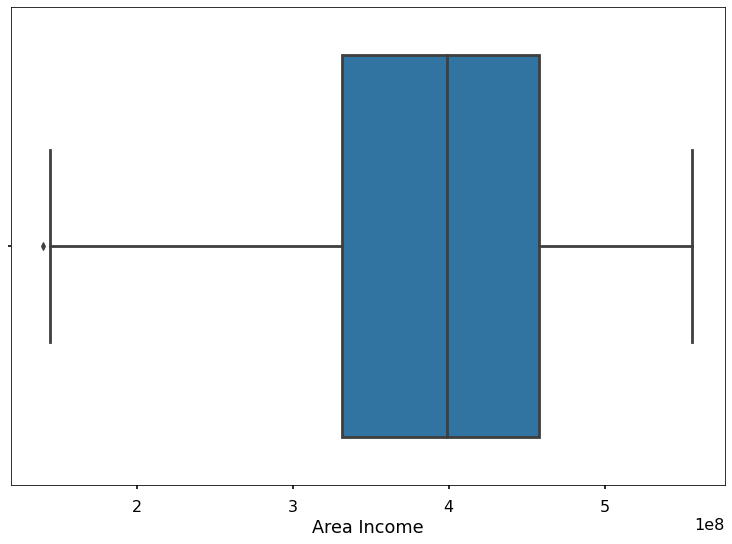

In [42]:
sns.boxplot(df_iqr['Area Income'])

In [43]:
from scipy import stats
df_zscore = df_pre.copy()
outliers_cols_list = ['Area Income']

print(f'Jumlah baris sebelum memfilter outlier: {len(df_zscore)}')

filtered_entries = np.array([True] * len(df_zscore))

for col in outliers_cols_list:
    zscore = abs(stats.zscore(df_zscore[col])) # hitung absolute z-scorenya
    filtered_entries = (zscore < 3) & filtered_entries # keep yang kurang dari 3 absolute z-scorenya
    
df_zscore = df_zscore[filtered_entries].reset_index().drop(columns=['index']) # filter, cuma ambil yang z-scorenya dibawah 3

print(f'Jumlah baris setelah memfilter outlier: {len(df_zscore)}')
print(f'Jumlah data yang difilter: {round((len(df_pre)-len(df_zscore))/len(df_pre)*100, 2)}%')

Jumlah baris sebelum memfilter outlier: 1000
Jumlah baris setelah memfilter outlier: 997
Jumlah data yang difilter: 0.3%


<AxesSubplot: xlabel='Area Income'>

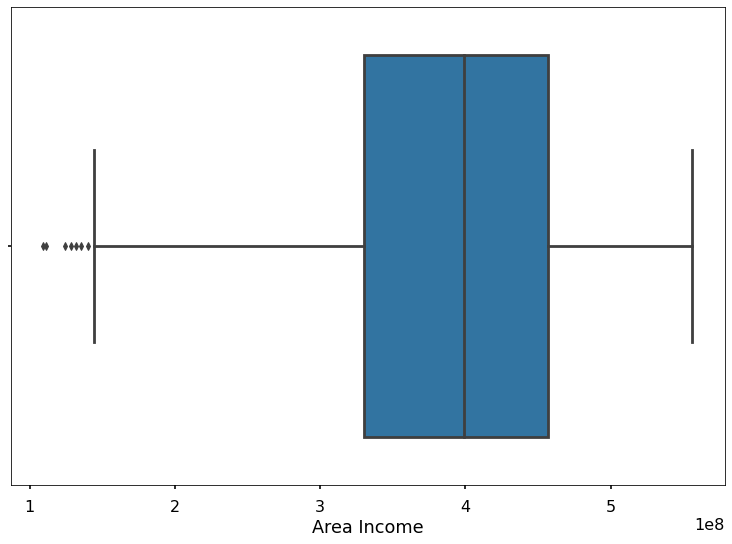

In [44]:
sns.boxplot(df_zscore['Area Income'])

Dari kedua metode tersebut yang akan digunakan adalah hasil dengan menggunakan metode IQR. Karena data lebih bersih d

### Feature Selection

Akan didrop kolom `city`, `province` karena memiliki banyak nilai unik dan `Weekdays` yang sudah dikonversi ke weekend atau weekday. Untuk month dan days akan dilakukan feature scaling.

In [45]:
df_select = df_iqr.copy()
df_select.drop(columns=['city','province','Weekdays'],inplace = True)
df_select.head(5)

Daily Time Spent on Site  Age  Area Income  Daily Internet Usage  \
0                     68.95   35  432837300.0                256.09   
1                     80.23   31  479092950.0                193.77   
2                     69.47   26  418501580.0                236.50   
3                     74.15   29  383643260.0                245.89   
4                     68.37   35  517229930.0                225.58   

      Gender    category  Target  Month  Days Types of days  
0  Perempuan   Furniture       0      3    27       Weekend  
1  Laki-Laki        Food       0      4     4       Weekday  
2  Perempuan  Electronic       0      3    13       Weekend  
3  Laki-Laki       House       0      1    10       Weekend  
4  Perempuan     Finance       0      6     3       Weekday

In [46]:
fst = df_select.copy()

### Feature Encoding
Teknik feature encoding yang digunakan adalah one hot encoding karena semua variabel kategori bukan merupakan variabel yang bersifat ordinal atau bertingkat

In [47]:
list_dummy = ['Gender','category','Types of days']
for i in list_dummy:
    ohe = pd.get_dummies(fst[i], prefix=i)
    fst = fst.join(ohe)

fst

Daily Time Spent on Site  Age  Area Income  Daily Internet Usage  \
0                   68.950000   35  432837300.0                256.09   
1                   80.230000   31  479092950.0                193.77   
2                   69.470000   26  418501580.0                236.50   
3                   74.150000   29  383643260.0                245.89   
4                   68.370000   35  517229930.0                225.58   
..                        ...  ...          ...                   ...   
995                 72.970000   30  499691990.0                208.58   
996                 51.300000   45  474475190.0                134.42   
997                 64.929524   51  296910040.0                120.37   
998                 55.550000   19  293445530.0                187.95   
999                 45.010000   26  209130600.0                178.35   

        Gender    category  Target  Month  Days Types of days  ...  \
0    Perempuan   Furniture       0      3    27       Weekend  ...   
1    Laki-Laki        Food       0      4     4       Weekday  ...   
2    Perempuan  Electronic       0      3    13       Weekend  ...   
3    Laki-Laki       House       0      1    10       Weekend  ...   
4    Perempuan     Finance       0      6     3       Weekday  ...   
..         ...         ...     ...    ...   ...           ...  ...   
995  Laki-Laki     Finance       1      2    11       Weekday  ...   
996  Laki-Laki  Electronic       1      4    22       Weekday  ...   
997  Laki-Laki      Travel       1      2     1       Weekday  ...   
998  Perempuan        Bank       0      3    24       Weekday  ...   
999  Perempuan      Travel       1      6     3       Weekday  ...   

     category_Fashion  category_Finance  category_Food  category_Furniture  \
0                   0                 0              0                   1   
1                   0                 0              1                   0   
2                   0                 0              0                   0   
3                   0                 0              0                   0   
4                   0                 1              0                   0   
..                ...               ...            ...                 ...   
995                 0                 1              0                   0   
996                 0                 0              0                   0   
997                 0                 0              0                   0   
998                 0                 0              0                   0   
999                 0                 0              0                   0   

     category_Health  category_House  category_Otomotif  category_Travel  \
0                  0               0                  0                0   
1                  0               0                  0                0   
2                  0               0                  0                0   
3                  0               1                  0                0   
4                  0               0                  0                0   
..               ...             ...                ...              ...   
995                0               0                  0                0   
996                0               0                  0                0   
997                0               0                  0                1   
998                0               0                  0                0   
999                0               0                  0                1   

     Types of days_Weekday  Types of days_Weekend  
0                        0                      1  
1                        1                      0  
2                        0                      1  
3                        0                      1  
4                        1                      0  
..                     ...                    ...  
995                      1                      0  
996                  

In [48]:
fst.drop(columns=list_dummy,inplace = True)
fst.head(5)

Daily Time Spent on Site  Age  Area Income  Daily Internet Usage  Target  \
0                     68.95   35  432837300.0                256.09       0   
1                     80.23   31  479092950.0                193.77       0   
2                     69.47   26  418501580.0                236.50       0   
3                     74.15   29  383643260.0                245.89       0   
4                     68.37   35  517229930.0                225.58       0   

   Month  Days  Gender_Laki-Laki  Gender_Perempuan  category_Bank  ...  \
0      3    27                 0                 1              0  ...   
1      4     4                 1                 0              0  ...   
2      3    13                 0                 1              0  ...   
3      1    10                 1                 0              0  ...   
4      6     3                 0                 1              0  ...   

   category_Fashion  category_Finance  category_Food  category_Furniture  \
0                 0                 0              0                   1   
1                 0                 0              1                   0   
2                 0                 0              0                   0   
3                 0                 0              0                   0   
4                 0                 1              0                   0   

   category_Health  category_House  category_Otomotif  category_Travel  \
0                0               0                  0                0   
1                0               0                  0                0   
2                0               0                  0                0   
3                0               1                  0                0   
4                0               0                  0                0   

   Types of days_Weekday  Types of days_Weekend  
0                      0                      1  
1                      1                      0  
2                      0                      1  
3                      0                      1  
4                      1                      0  

[5 rows x 21 columns]

In [75]:
fst.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 991 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  991 non-null    float64
 1   Age                       991 non-null    int64  
 2   Area Income               991 non-null    float64
 3   Daily Internet Usage      991 non-null    float64
 4   Target                    991 non-null    int64  
 5   Month                     991 non-null    int64  
 6   Days                      991 non-null    int64  
 7   Gender_Laki-Laki          991 non-null    uint8  
 8   Gender_Perempuan          991 non-null    uint8  
 9   category_Bank             991 non-null    uint8  
 10  category_Electronic       991 non-null    uint8  
 11  category_Fashion          991 non-null    uint8  
 12  category_Finance          991 non-null    uint8  
 13  category_Food             991 non-null    uint8  
 14  category_F

### Split Feature dan Target

In [49]:
X = fst.drop(labels=['Target'],axis=1)
y = fst[['Target']] 

In [50]:
#Splitting the data into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [51]:
y_train.value_counts()

Target
1         347
0         346
dtype: int64

In [76]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 693 entries, 945 to 102
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  693 non-null    float64
 1   Age                       693 non-null    int64  
 2   Area Income               693 non-null    float64
 3   Daily Internet Usage      693 non-null    float64
 4   Month                     693 non-null    int64  
 5   Days                      693 non-null    int64  
 6   Gender_Laki-Laki          693 non-null    uint8  
 7   Gender_Perempuan          693 non-null    uint8  
 8   category_Bank             693 non-null    uint8  
 9   category_Electronic       693 non-null    uint8  
 10  category_Fashion          693 non-null    uint8  
 11  category_Finance          693 non-null    uint8  
 12  category_Food             693 non-null    uint8  
 13  category_Furniture        693 non-null    uint8  
 14  category

## Data Modeling

### Tanpa Feature Scaling

In [52]:
# Algoritma Machine Learning
logreg = LogisticRegression() 
knn = KNeighborsClassifier()
dtc = DecisionTreeClassifier()
rf = RandomForestClassifier()
grad = GradientBoostingClassifier()
xg = XGBClassifier()
MLA = [logreg, knn, dtc, rf, grad, xg]

In [53]:
# Create model evaluation results in the form of a Data Frame
MLA_columns = []
MLA_compare = pd.DataFrame(columns = MLA_columns)

row_index = 0
for alg in MLA:  
    start = dt.now()
    predicted = alg.fit(X_train, y_train).predict(X_test)
    y_pred_proba_test = alg.fit(X_train, y_train).predict_proba(X_test)
    y_pred_proba_train = alg.fit(X_train, y_train).predict_proba(X_train)
    score = cross_validate(alg, X, y, cv=5, scoring='roc_auc', return_train_score=True)
    MLA_name = alg.__class__.__name__
    MLA_compare.loc[row_index,'MLA used'] = MLA_name
    MLA_compare.loc[row_index, 'Train Accuracy (%)'] = round(alg.score(X_train, y_train), 3)*100
    MLA_compare.loc[row_index, 'Test Accuracy (%)'] = round(alg.score(X_test, y_test), 3)*100
    MLA_compare.loc[row_index, 'Precission (%)'] = round(precision_score(y_test, predicted),3)*100
    MLA_compare.loc[row_index, 'Recall (%)'] = round(recall_score(y_test, predicted),3)*100
    MLA_compare.loc[row_index, 'F1-Score (%)'] = round((f1_score(y_test, predicted)),3)*100
    MLA_compare.loc[row_index, 'roc-auc (test prob)'] = round((roc_auc_score(y_test, y_pred_proba_test[:, 1])),3)
    MLA_compare.loc[row_index, 'roc-auc (train prob)'] = round((roc_auc_score(y_train, y_pred_proba_train[:, 1])),3)
    MLA_compare.loc[row_index, 'roc-auc (crossval train)'] = round(score['train_score'].mean(),3)
    MLA_compare.loc[row_index, 'roc-auc (crossval test)'] = round(score['test_score'].mean(),3)
    MLA_compare.loc[row_index, 'Time used'] = (dt.now()-start).total_seconds()

    row_index+=1

In [54]:
MLA_compare

MLA used  Train Accuracy (%)  Test Accuracy (%)  \
0          LogisticRegression                49.9               51.7   
1        KNeighborsClassifier                76.5               65.8   
2      DecisionTreeClassifier               100.0               94.0   
3      RandomForestClassifier               100.0               97.3   
4  GradientBoostingClassifier                99.9               97.3   
5               XGBClassifier               100.0               96.3   

   Precission (%)  Recall (%)  F1-Score (%)  roc-auc (test prob)  \
0             0.0         0.0           0.0                0.713   
1            68.1        54.9          60.8                0.681   
2            93.1        93.8          93.4                0.946   
3            98.6        95.8          97.2                0.991   
4            97.2        97.2          97.2                0.990   
5            97.2        95.1          96.1                0.991   

   roc-auc (train prob)  roc-auc (crossval train)  roc-auc (crossval test)  \
0                 0.787                     0.765                    0.765   
1                 0.856                     0.848                    0.702   
2                 1.000                     1.000                    0.931   
3                 1.000                     1.000                    0.991   
4                 1.000                     1.000                    0.987   
5                 1.000                     1.000                    0.989   

   Time used  
0   0.336980  
1   0.687961  
2   0.157992  
3   2.541858  
4   2.058881  
5   1.189932

Dari matrix evaluasi diatas diperoleh bahwa Random Forest merupakan algoritma yang memiliki performa yang lebih baik dibandingkan algoritma yang lainnya. Namun, dalam segi waktu komputasi, random forest merupakan algoritma yang paling banyak membutuhkan waktu. Sedangkan algoritma yang membutuhkan waktu paling sedikit adalah algoritma Decision Tree. Mari kita cek jika dilakukan feature transformation.

### Dengan Feature Scaling

In [55]:
X_train2 = X_train.copy()
y_train2 = y_train.copy()

In [77]:
X_train2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693 entries, 0 to 692
Data columns (total 22 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Gender_Laki-Laki               693 non-null    uint8  
 1   Gender_Perempuan               693 non-null    uint8  
 2   category_Bank                  693 non-null    uint8  
 3   category_Electronic            693 non-null    uint8  
 4   category_Fashion               693 non-null    uint8  
 5   category_Finance               693 non-null    uint8  
 6   category_Food                  693 non-null    uint8  
 7   category_Furniture             693 non-null    uint8  
 8   category_Health                693 non-null    uint8  
 9   category_House                 693 non-null    uint8  
 10  category_Otomotif              693 non-null    uint8  
 11  category_Travel                693 non-null    uint8  
 12  Types of days_Weekday          693 non-null    uin

#### Data Train

In [56]:
ls_norm = ['Daily Time Spent on Site', 'Age', 'Daily Internet Usage','Area Income']
norm = MinMaxScaler()
for i in ls_norm:
  X_train2['norm_'+i] = norm.fit_transform(X_train2[i].values.reshape(len(X_train2),1))

In [57]:
X_train2['Sin_Month'] = np.sin(2 * np.pi * X_train2['Month'] / max(X_train2['Month']))
X_train2['Cos_Month'] = np.cos(2 * np.pi * X_train2['Month'] / max(X_train2['Month']))

X_train2['Sin_Days'] = np.sin(2 * np.pi * X_train2['Days'] / max(X_train2['Days']))
X_train2['Cos_Days'] = np.cos(2 * np.pi * X_train2['Days'] / max(X_train2['Days']))

X_train2.head(5)

Daily Time Spent on Site  Age  Area Income  Daily Internet Usage  Month  \
945                     89.80   36  401313010.0                198.24      2   
575                     48.86   54  372320830.0                134.46      1   
933                     36.73   34  327161380.0                149.79      6   
405                     81.58   41  388357340.0                248.16      1   
529                     89.37   34  299321540.0                162.03      4   

     Days  Gender_Laki-Laki  Gender_Perempuan  category_Bank  \
945     2                 0                 1              0   
575     9                 0                 1              0   
933    27                 1                 0              0   
405    27                 0                 1              0   
529    16                 1                 0              0   

     category_Electronic  ...  Types of days_Weekday  Types of days_Weekend  \
945                    0  ...                      1                      0   
575                    0  ...                      0                      1   
933                    0  ...                      1                      0   
405                    0  ...                      1                      0   
529                    0  ...                      0                      1   

     norm_Daily Time Spent on Site  norm_Age  norm_Daily Internet Usage  \
945                       0.973286  0.414634                   0.596274   
575                       0.276672  0.853659                   0.189358   
933                       0.070274  0.365854                   0.287163   
405                       0.833418  0.536585                   0.914763   
529                       0.965969  0.365854                   0.365255   

     norm_Area Income  Sin_Month  Cos_Month  Sin_Days  Cos_Days  
945          0.623812   0.974928  -0.222521  0.394356  0.918958  
575          0.553484   0.781831   0.623490  0.968077 -0.250653  
933          0.443939  -0.781831   0.623490 -0.724793  0.688967  
405          0.592385   0.781831   0.623490 -0.724793  0.688967  
529          0.376406  -0.433884  -0.900969 -0.101168 -0.994869  

[5 rows x 28 columns]

In [58]:
X_train2.drop(columns=['Month','Days','Daily Time Spent on Site', 'Age', 'Daily Internet Usage','Area Income'],inplace = True)

In [59]:
X_train2.reset_index(inplace = True, drop =True)

In [60]:
y_train2.reset_index(inplace = True, drop =True)

In [61]:
X_train2.head(5)

Gender_Laki-Laki  Gender_Perempuan  category_Bank  category_Electronic  \
0                 0                 1              0                    0   
1                 0                 1              0                    0   
2                 1                 0              0                    0   
3                 0                 1              0                    0   
4                 1                 0              0                    0   

   category_Fashion  category_Finance  category_Food  category_Furniture  \
0                 1                 0              0                   0   
1                 0                 0              0                   1   
2                 0                 0              1                   0   
3                 0                 0              0                   0   
4                 0                 0              0                   0   

   category_Health  category_House  ...  Types of days_Weekday  \
0                0               0  ...                      1   
1                0               0  ...                      0   
2                0               0  ...                      1   
3                0               0  ...                      1   
4                0               0  ...                      0   

   Types of days_Weekend  norm_Daily Time Spent on Site  norm_Age  \
0                      0                       0.973286  0.414634   
1                      1                       0.276672  0.853659   
2                      0                       0.070274  0.365854   
3                      0                       0.833418  0.536585   
4                      1                       0.965969  0.365854   

   norm_Daily Internet Usage  norm_Area Income  Sin_Month  Cos_Month  \
0                   0.596274          0.623812   0.974928  -0.222521   
1                   0.189358          0.553484   0.781831   0.623490   
2                   0.287163          0.443939  -0.781831   0.623490   
3                   0.914763          0.592385   0.781831   0.623490   
4                   0.365255          0.376406  -0.433884  -0.900969   

   Sin_Days  Cos_Days  
0  0.394356  0.918958  
1  0.968077 -0.250653  
2 -0.724793  0.688967  
3 -0.724793  0.688967  
4 -0.101168 -0.994869  

[5 rows x 22 columns]

#### Data test

In [62]:
X_test2 = X_test.copy()
y_test2 = y_test.copy()

##### Normalisasi

In [63]:
ls_norm = ['Daily Time Spent on Site', 'Age', 'Daily Internet Usage','Area Income']
norm = MinMaxScaler()
for i in ls_norm:
  X_test2['norm_'+i] = norm.fit_transform(X_test2[i].values.reshape(len(X_test2),1))

##### Handle Cyclic Data

In [64]:
X_test2['Sin_Month'] = np.sin(2 * np.pi * X_test2['Month'] / max(X_test2['Month']))
X_test2['Cos_Month'] = np.cos(2 * np.pi * X_test2['Month'] / max(X_test2['Month']))

X_test2['Sin_Days'] = np.sin(2 * np.pi * X_test2['Days'] / max(X_test2['Days']))
X_test2['Cos_Days'] = np.cos(2 * np.pi * X_test2['Days'] / max(X_test2['Days']))

X_test2.head(5)

Daily Time Spent on Site  Age  Area Income  Daily Internet Usage  Month  \
214                     81.98   40  458233440.0                229.22      4   
332                     56.30   49  472016720.0                135.24      2   
503                     58.21   37  333028080.0                105.94      2   
310                     76.56   34  491253770.0                221.53      4   
88                      57.70   34  298876690.0                109.07      3   

     Days  Gender_Laki-Laki  Gender_Perempuan  category_Bank  \
214    15                 0                 1              0   
332     3                 1                 0              0   
503     7                 0                 1              0   
310    23                 1                 0              0   
88     14                 0                 1              1   

     category_Electronic  ...  Types of days_Weekday  Types of days_Weekend  \
214                    0  ...                      1                      0   
332                    0  ...                      1                      0   
503                    0  ...                      0                      1   
310                    0  ...                      0                      1   
88                     0  ...                      1                      0   

     norm_Daily Time Spent on Site  norm_Age  norm_Daily Internet Usage  \
214                       0.839368  0.500000                   0.766743   
332                       0.402856  0.714286                   0.186655   
503                       0.435322  0.428571                   0.005802   
310                       0.747238  0.357143                   0.719277   
88                        0.426653  0.357143                   0.025122   

     norm_Area Income  Sin_Month  Cos_Month  Sin_Days  Cos_Days  
214          0.782603  -0.433884  -0.900969  0.101168 -0.994869  
332          0.816493   0.974928  -0.222521  0.571268  0.820763  
503          0.474753   0.974928  -0.222521  0.988468  0.151428  
310          0.863792  -0.433884  -0.900969 -0.998717 -0.050649  
88           0.390783   0.433884  -0.900969  0.299363 -0.954139  

[5 rows x 28 columns]

In [65]:
X_test2.drop(columns=['Month','Days','Daily Time Spent on Site', 'Age', 'Daily Internet Usage','Area Income'],inplace = True)

In [66]:
X_test2.reset_index(inplace = True, drop =True)
y_test2.reset_index(inplace = True, drop =True)

##### Model Evaluasi

In [67]:
# Algoritma Machine Learning
logreg = LogisticRegression() 
knn = KNeighborsClassifier()
dtc = DecisionTreeClassifier()
rf = RandomForestClassifier(random_state=42)
grad = GradientBoostingClassifier()
xg = XGBClassifier()
MLA = [logreg, knn, dtc, rf, grad, xg]

In [68]:
# Create model evaluation results in the form of a Data Frame
MLA_columns = []
MLA_compare = pd.DataFrame(columns = MLA_columns)

row_index = 0
for alg in MLA:  
    start = dt.now()
    predicted = alg.fit(X_train2, y_train2).predict(X_test2)
    y_pred_proba_test = alg.fit(X_train2, y_train2).predict_proba(X_test2)
    y_pred_proba_train = alg.fit(X_train2, y_train2).predict_proba(X_train2)
    score = cross_validate(alg, X, y, cv=5, scoring='roc_auc', return_train_score=True)
    MLA_name = alg.__class__.__name__
    MLA_compare.loc[row_index,'MLA used'] = MLA_name
    MLA_compare.loc[row_index, 'Train Accuracy (%)'] = round(alg.score(X_train2, y_train2), 3)*100
    MLA_compare.loc[row_index, 'Test Accuracy (%)'] = round(alg.score(X_test2, y_test2), 3)*100
    MLA_compare.loc[row_index, 'Precission (%)'] = round(precision_score(y_test2, predicted),3)*100
    MLA_compare.loc[row_index, 'Recall (%)'] = round(recall_score(y_test2, predicted),3)*100
    MLA_compare.loc[row_index, 'F1-Score (%)'] = round((f1_score(y_test2, predicted)),3)*100
    MLA_compare.loc[row_index, 'roc-auc (test prob)'] = round((roc_auc_score(y_test2, y_pred_proba_test[:, 1])),3)
    MLA_compare.loc[row_index, 'roc-auc (train prob)'] = round((roc_auc_score(y_train2, y_pred_proba_train[:, 1])),3)
    MLA_compare.loc[row_index, 'roc-auc (crossval train)'] = round(score['train_score'].mean(),3)
    MLA_compare.loc[row_index, 'roc-auc (crossval test)'] = round(score['test_score'].mean(),3)
    MLA_compare.loc[row_index, 'Time used'] = (dt.now()-start).total_seconds()

    row_index+=1

In [69]:
MLA_compare

MLA used  Train Accuracy (%)  Test Accuracy (%)  \
0          LogisticRegression                96.0               98.7   
1        KNeighborsClassifier                86.3               73.8   
2      DecisionTreeClassifier               100.0               92.6   
3      RandomForestClassifier               100.0               98.0   
4  GradientBoostingClassifier                99.9               97.3   
5               XGBClassifier               100.0               96.6   

   Precission (%)  Recall (%)  F1-Score (%)  roc-auc (test prob)  \
0           100.0        97.2          98.6                0.993   
1            73.2        72.2          72.7                0.790   
2            94.2        91.0          92.6                0.933   
3            98.6        97.2          97.9                0.992   
4            97.2        97.2          97.2                0.992   
5            97.2        95.8          96.5                0.990   

   roc-auc (train prob)  roc-auc (crossval train)  roc-auc (crossval test)  \
0                 0.992                     0.765                    0.765   
1                 0.927                     0.848                    0.702   
2                 1.000                     1.000                    0.932   
3                 1.000                     1.000                    0.990   
4                 1.000                     1.000                    0.987   
5                 1.000                     1.000                    0.989   

   Time used  
0   0.417974  
1   0.515970  
2   0.158023  
3   2.523826  
4   2.089882  
5   1.138934

Setelah dilakukan proses transformasi feature dengan menggunakan normalisasi pada beberapa fitur numerik dan transformasi kedalam nilai cosinus dari data yang bersifat cyclic didapatkan bahwa performa model dari berbagai algoritma mengalami peningkatan. yang mengalami peningkatan yang drastis adalah algoritma Logistic regression yang memiliki precissi 100%, Recal 97.2% dan F1-Score 98.6% sekaligus model yang memiliki nilai matrix evaluasi yang baik serta waktu komputasi yang tidak begitu lama. Akan tetapi nilai cross validation dari roc-auc model ini merupakan nilai yang paling kecil dibandingkan model lainya. 

Tujuan model adalah memprediksi jumlah maksimum pelanggan potensial yang mengklik iklan. Oleh karena itu kita harus meminimalkan False Positive dimana pelanggan yang tidak mengklik iklan diprediksi salah untuk mengklik iklan. Ini akan menyebabkan retargeting pasar yang salah kemudian menyebabkan potensi kerugian karena kita telah menghabiskan biaya pemasaran pada target yang salah.

Oleh karena itu kita harus mengoptimalkan skor Precission sambil tetap mempertimbangkan metrik lain berada di skor maksimum.
Akhirnya, model yang dipilih adalah model dengan algoritma Random Forest karena memiliki nilai precession dan accuracy yang lebih besar dibandingkan model yang lainnya. Akan tetapi juga dapat menggunakan model dengan algoritma Gradient Boosting yang memiliki perbedaan yang tidak jauh dengan hasil model algoritma Random Forest.

##### Visualisasi Cofusion Matrix

In [70]:
from sklearn import metrics
rf = RandomForestClassifier(random_state=42) # inisiasi object dengan nama rf
rf.fit(X_train2, y_train2) # fit model regression dari data train
y_pred = rf.predict(X_test2)
tn, fp, fn, tp = confusion_matrix(y_test2['Target'].values.tolist(), list(y_pred)).ravel()

print('True Positive', tp)
print('True Negative', tn)
print('False Positive', fp)
print('False Negative', fn)

True Positive 140
True Negative 152
False Positive 2
False Negative 4


[Text(0.5, 0, 'Did not Clicked'), Text(1.5, 0, 'Clicked')]

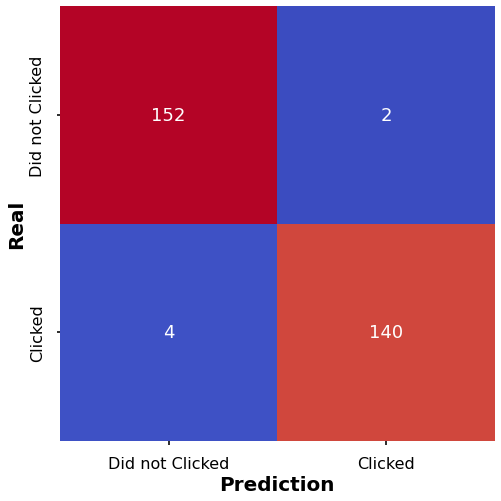

In [71]:
style.use('seaborn-v0_8-poster')
plt.figure(figsize=(8,8))
cm = confusion_matrix(y_test, y_pred)
ax = sns.heatmap(cm, square=True, annot=True, cmap='coolwarm', cbar=False, fmt="d", annot_kws={'size': 18})
ax.set_xlabel('Prediction', fontsize=20, fontweight='bold')
ax.set_ylabel('Real', fontsize=20, fontweight='bold')
ax.set_yticklabels(['Did not Clicked','Clicked'])
ax.set_xticklabels(['Did not Clicked','Clicked'])

Dari matriks confusion dapat dilihat bahwa model dengan algoritma random forest memilik perofma yang baik dimana dapat dilihat bahwa jumlah yang diprediksi mengklik tetapi tidak mengklik (False Positif) bernilai sedikit.

##### Feature Importance

In [72]:
rf.feature_importances_

array([0.00385724, 0.00458677, 0.00377777, 0.00226466, 0.00198144,
       0.00538963, 0.00372274, 0.00294587, 0.00231353, 0.00205276,
       0.00235415, 0.00449827, 0.003867  , 0.00386659, 0.2963497 ,
       0.10431318, 0.37416276, 0.1121673 , 0.01341234, 0.00748822,
       0.025396  , 0.01923208])

In [73]:
explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(X_test2)

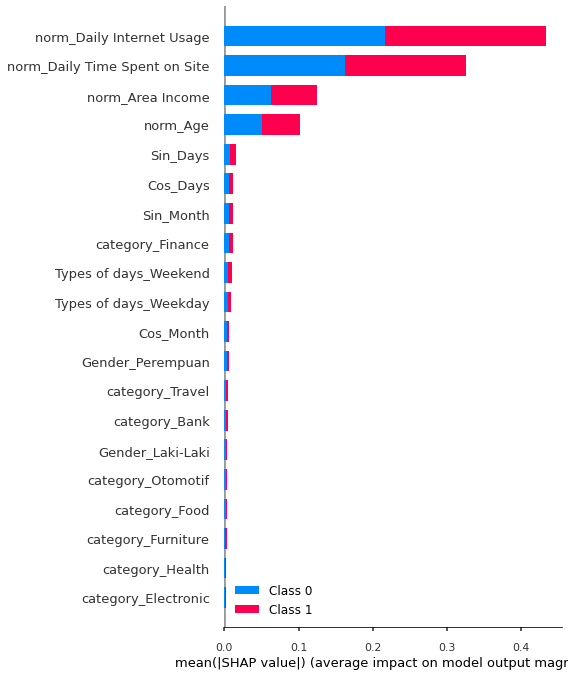

In [74]:
style.use('seaborn-v0_8-poster')
shap.summary_plot(shap_values, X_test2, plot_type='bar')


Dari fitur importance didapatkan bahwa 3 fitur penting adalah `Daily Internet Usage`, `Daily Spent on Site`, dan `Area Income`